##Curve Fitting using a function from scratch

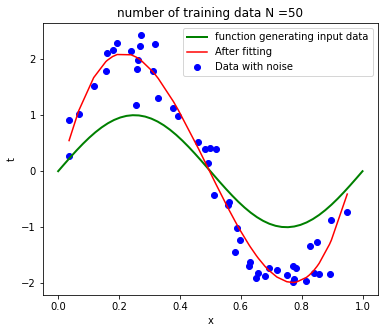

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
np.random.seed(20)
x = np.sort(np.random.rand(N,1),axis=0)
noise = np.random.normal(0,0.3,size=(N,1))
A = 2
y = A*np.sin(2*np.pi*x) + noise     #Create data and add noise to it.

# function to generate plot with different sizes
def vis_input_data(N,wit,hig):
   np.random.seed(20)
   plt.figure(figsize=(wit,hig))
   x = np.sort(np.random.rand(N,1),axis=0)
   noise = np.random.normal(0,0.3,size=(N,1))
   y = A*np.sin(2*np.pi*x) + noise

   plt.scatter(x,y,c='b',marker='o',label='Data with noise')
   plt.plot(np.linspace(0,1,50),np.sin(2*np.linspace(0,1,50)*np.pi),c='g',linewidth=2,label='function generating input data')
   #plt.plot(x,y,c='g',linewidth=2,label='function generating input data')
   plt.title('number of training data N =' + str(N)) 
   plt.xlabel('x');plt.ylabel('t')
lamda = 0.00000001522  # regularization parameter
poly_deg = 3

F = np.zeros(shape = (N,poly_deg+1))
F[:,0] = 1
for i in range(1,poly_deg+1):
    F[:,i] = np.power(x,i).reshape((N,))    

W = np.linalg.pinv((F.T.dot(F) + lamda*np.eye(poly_deg+1))).dot(F.T).dot(y)

vis_input_data(N,6,5)
plt.plot(x,F.dot(W),'r',label='After fitting')
plt.legend()
plt.show()

##Verification of the fitting using scikit-learn

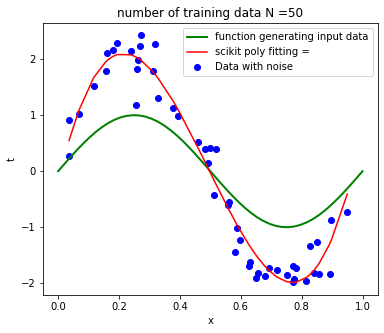

In [11]:
from sklearn.preprocessing import PolynomialFeatures
sk_poly_deg=3
poly_feature = PolynomialFeatures(degree=sk_poly_deg,include_bias=False)
x_poly = poly_feature.fit_transform(x)

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)

vis_input_data(N,6,5)
plt.plot(x,lin_reg.predict(x_poly),'r',label='scikit poly fitting =')
plt.legend()
plt.show()